In [2]:
install.packages("couchDB")

Installing package into '/gpfs/global_fs01/sym_shared/YPProdSpark/user/s7b6-27eedddadf83b9-67cce38fb4ab/R/libs'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/gpfs/global_fs01/sym_shared/YPProdSpark/user/s7b6-27eedddadf83b9-67cce38fb4ab/notebook/tmp/RtmpklL7kb/downloaded_packages'


In [3]:
library("couchDB")

Loading required package: RCurl
Loading required package: bitops

Attaching package: 'RCurl'

The following object is masked from 'package:SparkR':

    base64

Loading required package: httr
Loading required package: rjson


In [46]:
#sc <- sparkR.init()
#Re-using existing Spark Context. Please stop SparkR with sparkR.stop() or restart R to create a new Spark Context
#
sqlContext <- sparkRSQL.init(sc)

In [13]:
myconn <- couch_http_connection(host = "XXXX", port = 443, https = TRUE, service = "cloudant", user = "XXXX", password = "XXXX")

In [14]:
couch_list_databases(myconn)

[1] "_warehouser"                                  
[2] "pipe_db"                                      
[3] "reddit_ibmama_top_comments_only"              
[4] "reddit_regularreddit_top_comments_and_replies"
[5] "reddit_regularreddit_top_comments_only"

In [15]:
print(myconn)

$couch_http_host
[1] "b4713dfe-123e-4299-93b1-c7cd01968518-bluemix.cloudant.com"

$couch_http_port
[1] 443

$secure
[1] TRUE

$service
[1] "cloudant"

$user
[1] "b4713dfe-123e-4299-93b1-c7cd01968518-bluemix"

$password
[1] "3e4836b2172e03c084fb9b57d0c81b8e766b4e9f37ae43201e464a867f48dc74"

attr(,"class")
[1] "couch_connection"


In [16]:
results <- couch_fetch(myconn, database = "reddit_regularreddit_top_comments_and_replies/_all_docs", key = NULL, myOpts = NULL)

In [ ]:
r_json <- read.df(sqlContext, results, "json")
head(r_json)

In [ ]:
#df <- createDataFrame(sqlContext, results)
#head(df)

In [18]:

print(results)

$total_rows
[1] 4

$offset
[1] 0

$rows
$rows[[1]]
$rows[[1]]$id
[1] "_design/Top comments and replies"

$rows[[1]]$key
[1] "_design/Top comments and replies"

$rows[[1]]$value
$rows[[1]]$value$rev
[1] "1-edc6f6bb0062260ecf1160c81872efdd"



$rows[[2]]
$rows[[2]]$id
[1] "f4f7cfa487898608fff6eb639fe6ed26"

$rows[[2]]$key
[1] "f4f7cfa487898608fff6eb639fe6ed26"

$rows[[2]]$value
$rows[[2]]$value$rev
[1] "1-c0be345c89577577cdeb301328d9e4f5"



$rows[[3]]
$rows[[3]]$id
[1] "f4f7cfa487898608fff6eb639fe6efd3"

$rows[[3]]$key
[1] "f4f7cfa487898608fff6eb639fe6efd3"

$rows[[3]]$value
$rows[[3]]$value$rev
[1] "1-6b0c4d5588c127c57136dd6c917881cc"



$rows[[4]]
$rows[[4]]$id
[1] "f4f7cfa487898608fff6eb639fe6f112"

$rows[[4]]$key
[1] "f4f7cfa487898608fff6eb639fe6f112"

$rows[[4]]$value
$rows[[4]]$value$rev
[1] "1-aa11fd3a2efdfd711b6b63a8973cb53b"






In [19]:
results_df <- data.frame(results)
df <- createDataFrame(sqlContext, results_df)
head(df)

Warning message:
In FUN(X[[i]], ...): Use rows_id instead of rows.id  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_key instead of rows.key  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_rev instead of rows.rev  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_id_1 instead of rows.id.1  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_key_1 instead of rows.key.1  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_rev_1 instead of rows.rev.1  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_id_2 instead of rows.id.2  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_key_2 instead of rows.key.2  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_rev_2 instead of rows.rev.2  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_id_3 instead of rows.id.3  as column nameWarning message:
In FUN(X[[i]], ...): Use rows_key_3 instead of rows.key.3  as column nameWarning message:
In FUN(X[[i]]

,total_rows,offset,rows_id,rows_key,rows_rev,rows_id_1,rows_key_1,rows_rev_1,rows_id_2,rows_key_2,rows_rev_2,rows_id_3,rows_key_3,rows_rev_3
1,4,0,_design/Top comments and replies,_design/Top comments and replies,1-edc6f6bb0062260ecf1160c81872efdd,f4f7cfa487898608fff6eb639fe6ed26,f4f7cfa487898608fff6eb639fe6ed26,1-c0be345c89577577cdeb301328d9e4f5,f4f7cfa487898608fff6eb639fe6efd3,f4f7cfa487898608fff6eb639fe6efd3,1-6b0c4d5588c127c57136dd6c917881cc,f4f7cfa487898608fff6eb639fe6f112,f4f7cfa487898608fff6eb639fe6f112,1-aa11fd3a2efdfd711b6b63a8973cb53b


In [12]:
printSchema(df)

root
 |-- total_rows: integer (nullable = true)
 |-- offset: integer (nullable = true)
 |-- rows_id: string (nullable = true)
 |-- rows_key: string (nullable = true)
 |-- rows_rev: string (nullable = true)
 |-- rows_id_1: string (nullable = true)
 |-- rows_key_1: string (nullable = true)
 |-- rows_rev_1: string (nullable = true)
 |-- rows_id_2: string (nullable = true)
 |-- rows_key_2: string (nullable = true)
 |-- rows_rev_2: string (nullable = true)
 |-- rows_id_3: string (nullable = true)
 |-- rows_key_3: string (nullable = true)
 |-- rows_rev_3: string (nullable = true)


In [31]:
keys_list <- data.frame(results)
print(keys_list[,'total_rows'])
print(keys_list[,'rows.key.3'])
rows_df_2 <- data.frame()
for (i in 1:(keys_list[,'total_rows'] - 1) ){
 print(i)
 key <- paste('rows.key.',i,sep="")
 #print(key)   
 #print(keys_list[,key])   
 docs <- couch_fetch(myconn, database = "reddit_regularreddit_top_comments_and_replies", key = keys_list[,key], myOpts = NULL)   
 #print(docs)
  rows_df <- data.frame(docs)
  
  rows_df_2 <- rbind(rows_df_2,rows_df)
    
}
  df2 <- createDataFrame(sqlContext, rows_df_2)
  #head(df2)
  printSchema(df2)
  showDF(df2)

[1] 4
[1] f4f7cfa487898608fff6eb639fe6f112
Levels: f4f7cfa487898608fff6eb639fe6f112
[1] 1
[1] 2
[1] 3
root
 |-- X_id: string (nullable = true)
 |-- X_rev: string (nullable = true)
 |-- author: string (nullable = true)
 |-- created: integer (nullable = true)
 |-- edited: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)
 |-- Anger: string (nullable = true)
 |-- Disgust: string (nullable = true)
 |-- Fear: string (nullable = true)
 |-- Joy: string (nullable = true)
 |-- Sadness: string (nullable = true)
 |-- Analytical: string (nullable = true)
 |-- Confident: string (nullable = true)
 |-- Tentative: string (nullable = true)
 |-- Openness: string (nullable = true)
 |-- Conscientiousness: string (nullable = true)
 |-- Extraversion: string (nullable = true)
 |-- Agreeableness: string (nullable = true)
 |-- Emotional_Range: string (nullable = true)
 |-- pt_type: string (nullable = true)
+--------------------+

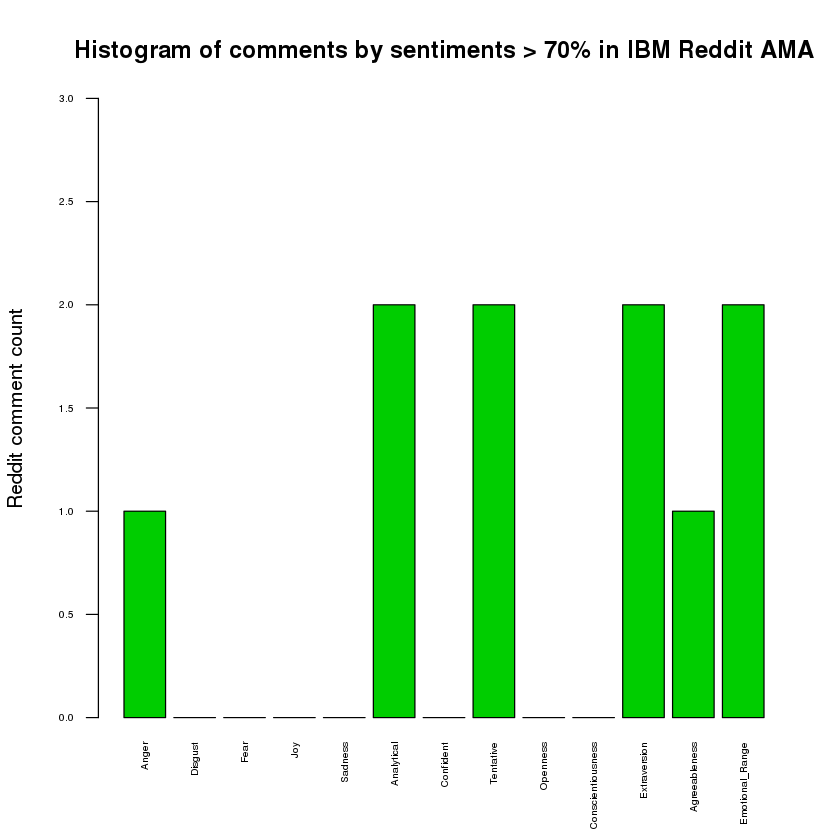

In [95]:
registerTempTable(df2,"reddit")
sentimentDistribution <- list()
columns <- colnames(df2[,9:21])
#count <- list()
for(i in 1:length(columns)){
    #print(i)
    query <- paste('SELECT count(*) as sentCount FROM reddit where ',columns[i],' > 70')
    df3 <- sql(sqlContext,query)
    collected <- collect(df3)
    #print(collected)
    count[columns[i]] <- collected$sentCount
    #print('Emotion is ')
    #print(columns[i])
    #print(count)
}
#print(count)
distribution <- unlist(count)
par(las=2)
barplot(distribution, main="Histogram of comments by sentiments > 70% in IBM Reddit AMA",col=139, ylim=c(0,3),cex.axis=0.5,cex.names=0.5,ylab="Reddit comment count")


In [38]:
col <- colnames(df2[,9:21])
print(col)
print(length(col))

 [1] "Anger"             "Disgust"           "Fear"             
 [4] "Joy"               "Sadness"           "Analytical"       
 [7] "Confident"         "Tentative"         "Openness"         
[10] "Conscientiousness" "Extraversion"      "Agreeableness"    
[13] "Emotional_Range"  
[1] 13


In [ ]:
docs <- couch_fetch(myconn, database = "reddit_regularreddit_top_comments_and_replies", key = keys_list[,'rows.key.3'], myOpts = NULL)

In [ ]:
print(docs)